In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [222]:
!pip install pyod

     |████████████████████████████████| 102kB 2.5MB/s 
     |████████████████████████████████| 2.1MB 8.3MB/s 
  Created wheel for pyod: filename=pyod-0.7.8.2-cp36-none-any.whl size=104997 sha256=56764bff8f1621e064149c55c00750f3ed3db7b6df0087b57f689fcc3551afe3
  Stored in directory: /root/.cache/pip/wheels/28/38/ec/0ecbcd67faeb595ac0dbd9b5f85d5c5bdcb4573819e65240fe
  Created wheel for combo: filename=combo-0.1.0-cp36-none-any.whl size=42043 sha256=37f9a3c6a2add9d086324f663f6cde97d44e461dbc94ebabc243767934f733c0
  Stored in directory: /root/.cache/pip/wheels/00/fd/6c/8da495ef08ce61844a646df2423c2b8ecda377a89c90ecd88e
  Created wheel for suod: filename=suod-0.0.3-cp36-none-any.whl size=2166457 sha256=dedad7387032bf1a94f403251e7e9919b7294cda1100f4b95768e25ea102554c
  Stored in directory: /root/.cache/pip/wheels/15/56/16/6944851600a62d859c89cd11df1adecbe0b6a02f7ad713d4dd
Successfully built pyod combo suod


In [224]:
!pip install suod 

In [119]:
%cd /content/drive/My\ Drive/TAA

/content/drive/My Drive/TAA


In [0]:
import scipy.io
mat = scipy.io.loadmat('satimage-2.mat')

In [0]:
X, y = mat['X'], mat['y']

In [0]:
y[y == 1] = -1
y[y == 0] = 1

In [0]:
from sklearn.svm import OneClassSVM
import time
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from pyod.models.knn import KNN
from pyod.models.ocsvm import OCSVM

In [243]:
outliers_fraction = len(y[y==-1])/len(y)
outliers_fraction

0.0122350508357746

In [0]:
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", OneClassSVM(nu=outlier_prop, kernel="rbf", gamma=0.0001)),
    ("Isolation Forest", IsolationForest(n_estimators=200, max_samples = 500, contamination=outliers_fraction, max_features=30, random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(n_neighbors=15, contamination=outliers_fraction))
    ]

In [0]:
def evaluation_detection(ytrue,ypred):
  x1 = X[:,10]
  x2 = X[:,20]

  fig = plt.figure(figsize=(10,14))

  ax0 = fig.add_subplot(5,2,1)
  ax0.scatter(x1, x2, alpha=0.7, c=ytrue)
  ax0.set_title('Représentation des données selon le vrai label')
  ax0.set_xlabel('x1') 
  ax0.set_xlabel('x2') 

  ax1 = fig.add_subplot(5,2,2)
  colors = np.array(['#377eb8', '#ff7f00']) 
  ax1.scatter(x1, x2, alpha=0.5,  c=colors[(ypred + 1) // 2])
  ax1.set_title('Représentation des données selon le label prédit')
  ax1.set_ylabel('x1')
  ax1.set_ylabel('x2')

  ax2 = fig.add_subplot(5,2,3)
  data = confusion_matrix(ytrue, ypred)
  labels = ['Outlier', 'Inliers']
  sns.heatmap(data, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Reds", ax=ax2) 
  ax2.set_title('Matrice de confusion')

  plt.tight_layout()
  plt.show()

---------Robust covariance-----------


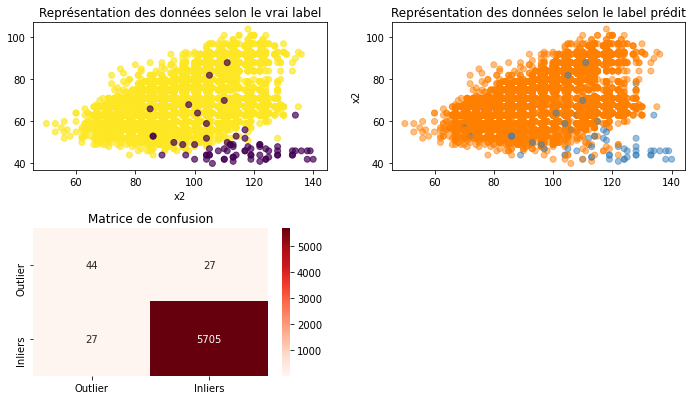

---------One-Class SVM-----------


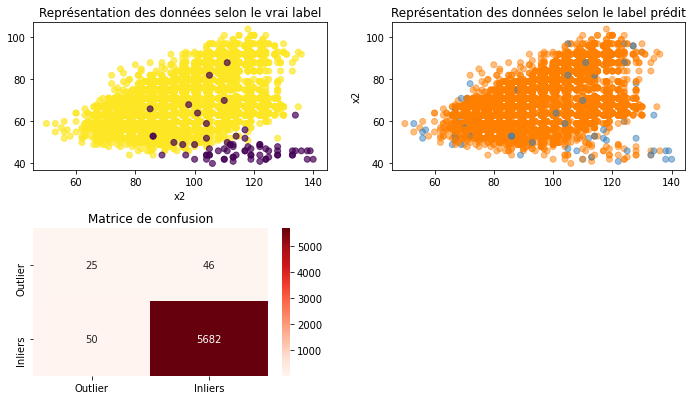

---------Isolation Forest-----------


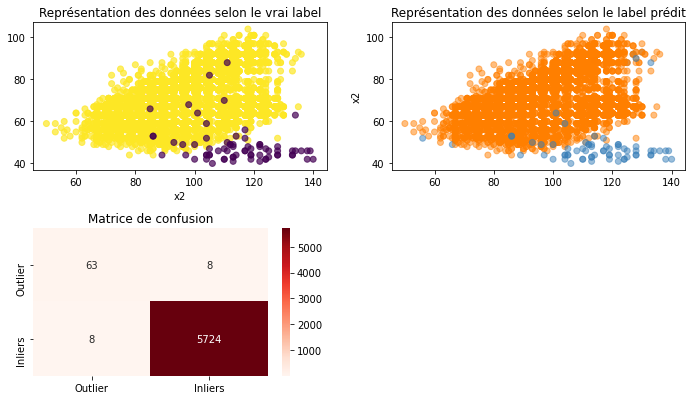

---------Local Outlier Factor-----------


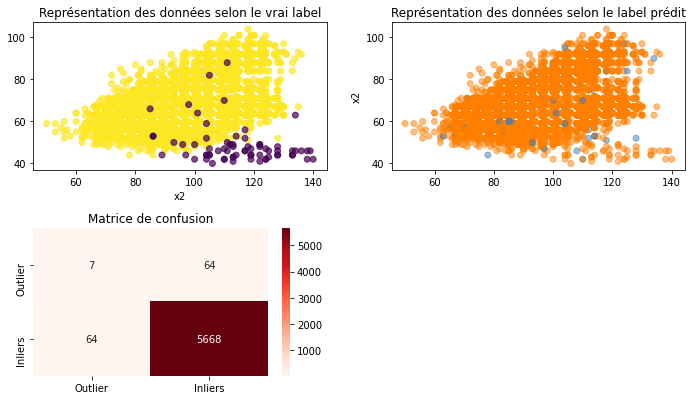

In [251]:
 for name, algorithm in anomaly_algorithms:
   algorithm.fit(X)
   if name == "Local Outlier Factor":
     y_pred = algorithm.fit_predict(X)
   else:
     y_pred = algorithm.predict(X)
   print('---------'+name+'-----------')
   evaluation_detection(y,y_pred)